In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
import datetime

from pathlib import Path
from run_analysis import postprocess, preprocess

sns.set_theme(style='darkgrid')

In [2]:
eraDf = pd.read_csv(os.path.join('Analysis', 'precip', 'eraDf.csv'))
#eraDf = pd.read_csv(os.path.join('Analysis', 'eraDf.csv'))
remsDf = pd.read_csv(os.path.join('Analysis', 'remsDf.csv'))
outDf = pd.read_csv(os.path.join('Analysis', 'outDf.csv'))

remsDf.timemet = remsDf.timemet.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
eraDf.timemet = eraDf.timemet.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
outDf.time = outDf.time.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [3]:
print(outDf.time.min())
print(outDf.time.max())

era_only = False

time_lim = [datetime.datetime.strptime("2015-04-20 01:00:00", '%Y-%m-%d %H:%M:%S'), 
            datetime.datetime.strptime("2015-04-20 06:00:00", '%Y-%m-%d %H:%M:%S')]
time_lim = [datetime.datetime.strptime("2015-04-06 00:00:00", '%Y-%m-%d %H:%M:%S'), 
            datetime.datetime.strptime("2015-04-23 23:00:00", '%Y-%m-%d %H:%M:%S')]
time_lim = None

2015-04-01 00:00:00
2015-04-30 22:00:00


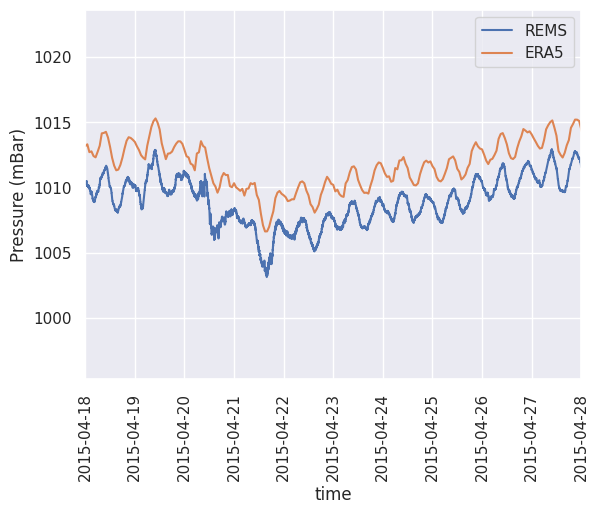

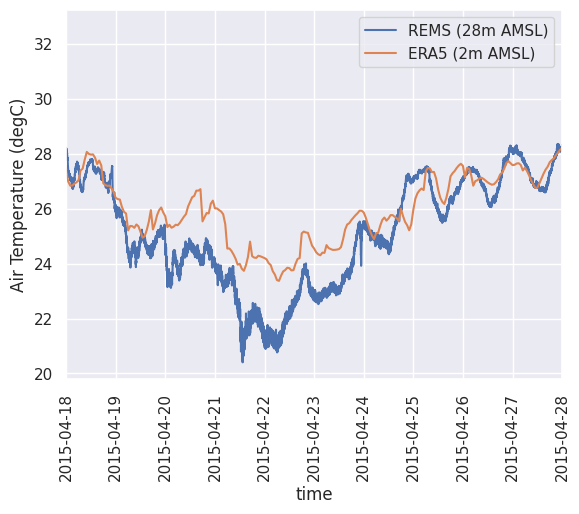

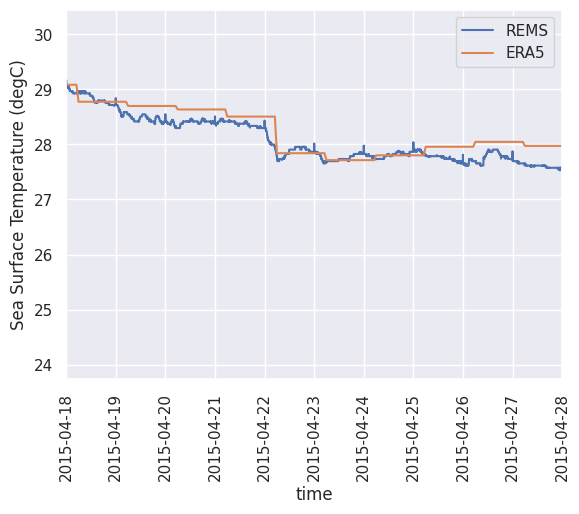

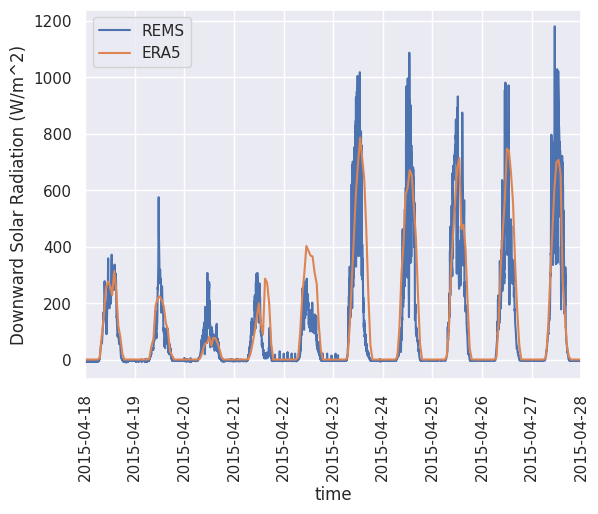

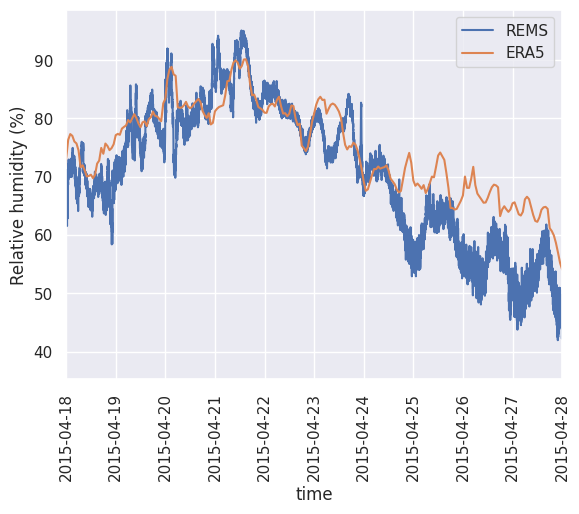

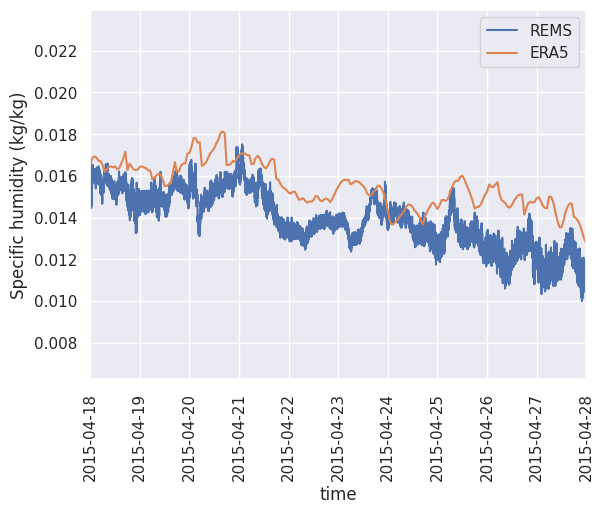

In [67]:
preprocess(eraDf, remsDf, writeDir=None, era_only=era_only, save_plots=False, time_lim=time_lim);

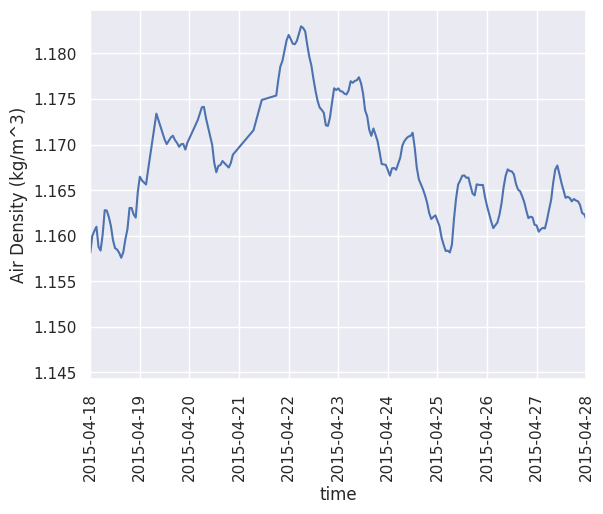

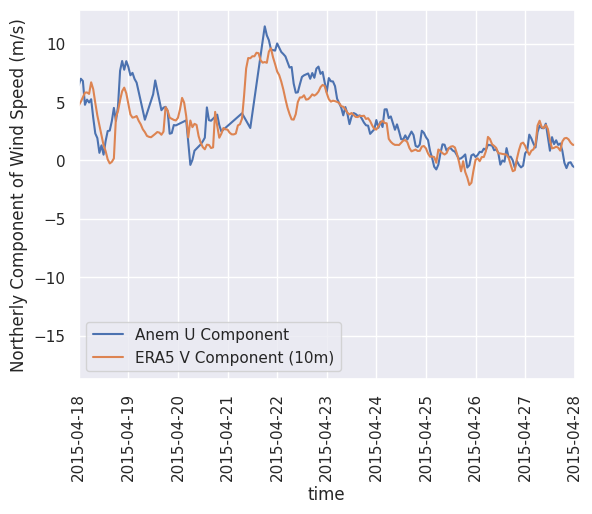

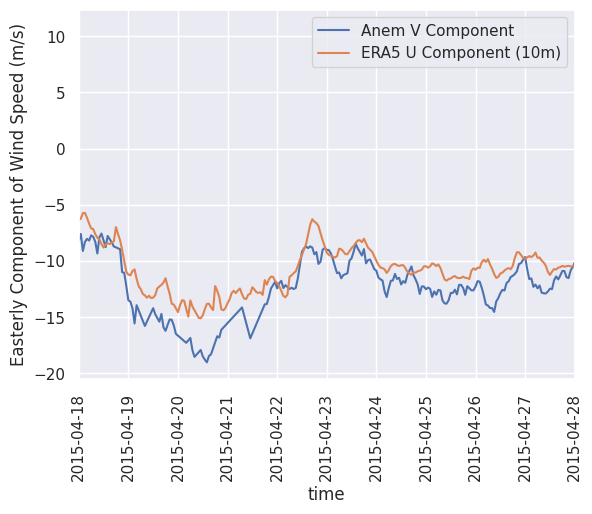

ValueError: Could not interpret value `U_10` for parameter `y`

In [4]:
postprocess(outDf, eraDf, remsDf, writeDir=None, era_only=era_only, save_plots=False, time_lim=time_lim);

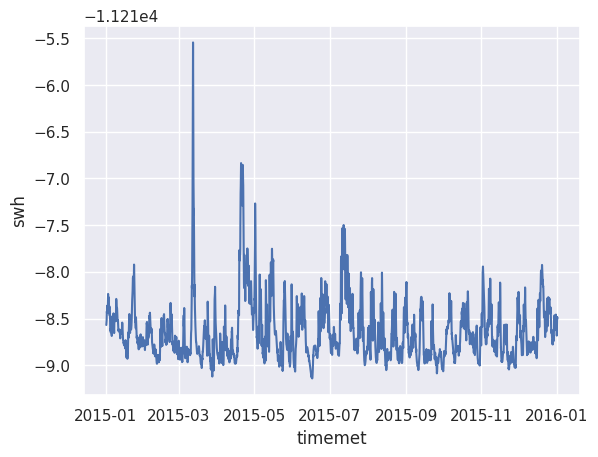

0.32508201029721484


In [73]:
sns.lineplot(x=eraDf.timemet, y=eraDf.swh)#y=eraDf.swh*8.93*10**-5)
plt.show()
print(eraDf.swh.std())

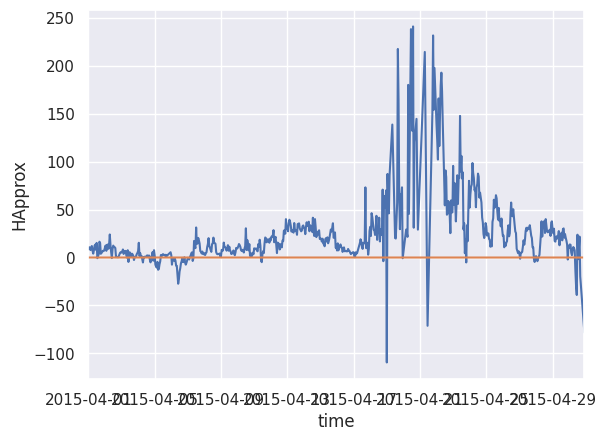

In [64]:
rolling_H = outDf.HApprox.rolling(window=1, win_type='gaussian')
rolling_crr = eraDf.crr.rolling(window=1, win_type='gaussian')

rolling_H = rolling_H.mean(std=2)
rolling_crr = rolling_crr.mean(std=2)

sns.lineplot(x=outDf.time, y=rolling_H)
sns.lineplot(x=eraDf.timemet, y=rolling_crr)
plt.xlim([outDf.time.min(), outDf.time.max()])
plt.show()

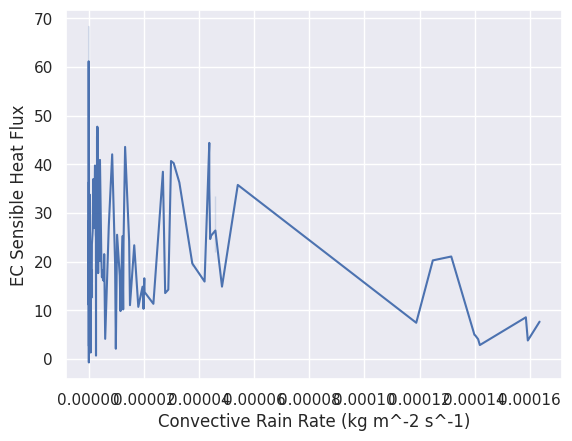

In [32]:
crr = eraDf.crr[eraDf.timemet.isin(outDf.time)].reset_index(drop=True)
rolling_crr = crr.rolling(window=10, center=True)
rolling_H = outDf.HApprox.rolling(window=10, center=True)

sns.lineplot(x=rolling_crr.mean(), y=rolling_H.mean(), markers=True)
plt.xlabel('Convective Rain Rate (kg m^-2 s^-1)')
plt.ylabel('EC Sensible Heat Flux')
#plt.xlim([-1e-7, 0.5e-5])
plt.show()